<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'>
<ul>We are using the same dataset as the previous laboratory exercise, now you need to build Neural networks</ul>

<li>Build three different networks with using:</li>
different layers, activation functions, neurans per layers, number of layers
<li>train your network and set the optimal number of epochs and batch size</li>
<li>Evaluate the three networks on the same test dataset</li>
<li>Compare the results</li>
</ul>

The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







203235 - Димитрија Тимески

Dataset-от кој ми се падна е:

> 5 house-price-prediction-challenge

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Vtor Kolokvium/Lab 3/train.csv")

In [ ]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
data.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

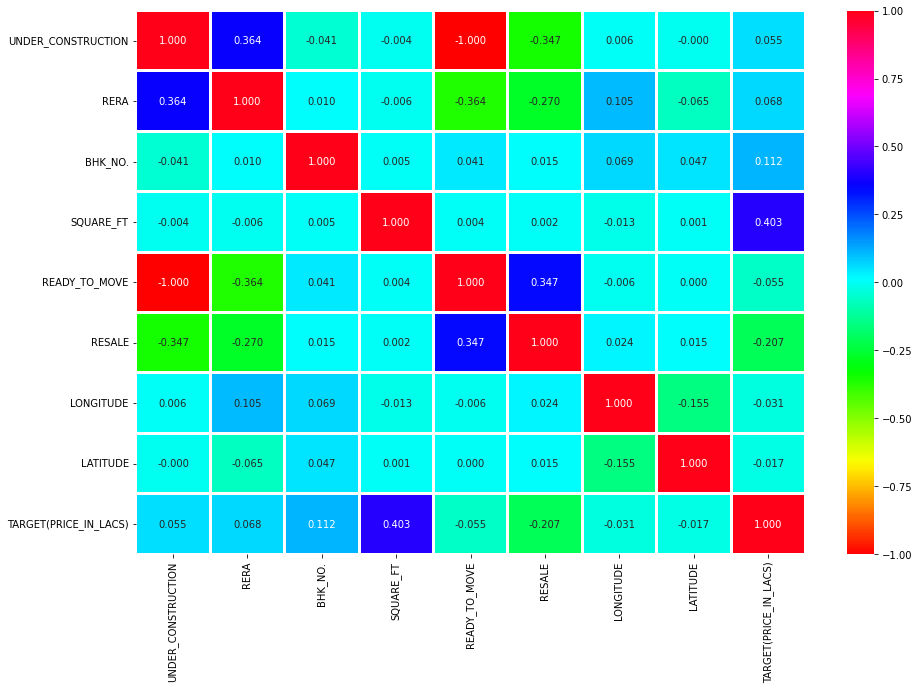

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
sns.heatmap(data.corr(),annot=True, cmap='hsv', fmt='.3f',linewidth=2)
plt.show()

In [ ]:
# data.drop(['UNDER_CONSTRUCTION','RERA','READY_TO_MOVE','LONGITUDE','LATITUDE'],axis=1,inplace=True)

#Preprocessing


###Method 1 - Didn't choose

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe1= OneHotEncoder()
data = data.join(pd.DataFrame(ohe1.fit_transform(data['POSTED_BY'].to_numpy().reshape(-1, 1)).toarray()))
data.rename(columns = {0:'POSTED_BY_0',1:'POSTED_BY_1',2:'POSTED_BY_2'}, inplace = True)

ohe2= OneHotEncoder()
data = data.join(pd.DataFrame(ohe2.fit_transform(data['BHK_NO.'].to_numpy().reshape(-1, 1)).toarray()))

data.drop(['POSTED_BY','ADDRESS',"BHK_NO."],axis=1,inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['BHK_OR_RK'] = le.fit_transform(data['BHK_OR_RK'])

data

,UNDER_CONSTRUCTION,RERA,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_0,...,6,7,8,9,10,11,12,13,14,15
0,0,0,0,1300.236407,1,1,12.969910,77.597960,55.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1275.000000,1,1,12.274538,76.644605,51.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,933.159722,1,1,12.778033,77.632191,43.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,929.921143,1,1,28.642300,77.344500,62.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,999.009247,0,1,22.592200,88.484911,60.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,0,2500.000000,1,1,27.140626,78.043277,45.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29447,0,0,0,769.230769,1,1,39.945409,-86.150721,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29448,0,0,0,1022.641509,1,1,26.928785,75.828002,27.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29449,0,0,0,927.079009,1,1,12.900150,80.227910,67.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Method 2 - Chosen

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['BHK_OR_RK'] = le.fit_transform(data['BHK_OR_RK'])
data['POSTED_BY'] = le.fit_transform(data['POSTED_BY'])
data['BHK_NO.'] = le.fit_transform(data['BHK_NO.'])
# data.drop(['ADDRESS','LONGITUDE','LATITUDE'],axis=1,inplace=True)
data.drop(['ADDRESS'],axis=1,inplace=True)
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,1,0,1300.236407,1,1,12.969910,77.597960,55.0
1,1,0,0,1,0,1275.000000,1,1,12.274538,76.644605,51.0
2,2,0,0,1,0,933.159722,1,1,12.778033,77.632191,43.0
3,2,0,1,1,0,929.921143,1,1,28.642300,77.344500,62.5
4,1,1,0,1,0,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,2,0,2500.000000,1,1,27.140626,78.043277,45.0
29447,2,0,0,1,0,769.230769,1,1,39.945409,-86.150721,16.0
29448,1,0,0,1,0,1022.641509,1,1,26.928785,75.828002,27.1
29449,2,0,0,1,0,927.079009,1,1,12.900150,80.227910,67.0


In [ ]:
Y = data['TARGET(PRICE_IN_LACS)']
Y = Y.to_frame()
X = data.drop(['TARGET(PRICE_IN_LACS)'],axis=1)
X

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,2,0,0,1,0,1300.236407,1,1,12.969910,77.597960
1,1,0,0,1,0,1275.000000,1,1,12.274538,76.644605
2,2,0,0,1,0,933.159722,1,1,12.778033,77.632191
3,2,0,1,1,0,929.921143,1,1,28.642300,77.344500
4,1,1,0,1,0,999.009247,0,1,22.592200,88.484911
...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,2,0,2500.000000,1,1,27.140626,78.043277
29447,2,0,0,1,0,769.230769,1,1,39.945409,-86.150721
29448,1,0,0,1,0,1022.641509,1,1,26.928785,75.828002
29449,2,0,0,1,0,927.079009,1,1,12.900150,80.227910


In [ ]:
Y

,TARGET(PRICE_IN_LACS)
0,55.0
1,51.0
2,43.0
3,62.5
4,60.5
...,...
29446,45.0
29447,16.0
29448,27.1
29449,67.0


# Splitting to Train and Test

20% test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5891 entries, 6971 to 7066
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           5891 non-null   int64  
 1   UNDER_CONSTRUCTION  5891 non-null   int64  
 2   RERA                5891 non-null   int64  
 3   BHK_NO.             5891 non-null   int64  
 4   BHK_OR_RK           5891 non-null   int64  
 5   SQUARE_FT           5891 non-null   float64
 6   READY_TO_MOVE       5891 non-null   int64  
 7   RESALE              5891 non-null   int64  
 8   LONGITUDE           5891 non-null   float64
 9   LATITUDE            5891 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 506.3 KB


#Scaling

Да ги направиме податоците да имаат просек 0 и варијанса 1

Ова значително ја подобрува невроската мрежа.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-6.55506679e-01, -4.69006247e-01, -6.80100338e-01, ...,
         2.74691343e-01,  1.97514661e-01,  1.09995179e+00],
       [-6.55506679e-01, -4.69006247e-01, -6.80100338e-01, ...,
         2.74691343e-01, -3.48910540e-01, -3.65472465e-01],
       [-6.55506679e-01,  2.13216776e+00,  1.47037127e+00, ...,
         2.74691343e-01, -4.37336229e-01, -2.92229109e-01],
       ...,
       [-6.55506679e-01, -4.69006247e-01, -6.80100338e-01, ...,
         2.74691343e-01,  1.10279608e+00, -1.04051094e-03],
       [ 1.28198389e+00, -4.69006247e-01,  1.47037127e+00, ...,
         2.74691343e-01,  6.15419041e-01,  7.39146696e-01],
       [ 1.28198389e+00, -4.69006247e-01, -6.80100338e-01, ...,
         2.74691343e-01, -1.81593483e-02,  4.34828580e-01]])

In [ ]:
X_test

array([[-0.65550668, -0.46900625, -0.68010034, ...,  0.27469134,
        -0.34898656, -0.37149746],
       [-0.65550668,  2.13216776,  1.47037127, ..., -3.64044964,
         0.5436507 ,  0.15253334],
       [ 1.28198389, -0.46900625, -0.68010034, ...,  0.27469134,
         0.1566864 , -0.57765128],
       ...,
       [-0.65550668, -0.46900625,  1.47037127, ...,  0.27469134,
        -0.34447152, -0.36962619],
       [-0.65550668, -0.46900625, -0.68010034, ...,  0.27469134,
        -0.4479659 , -0.27909558],
       [ 1.28198389,  2.13216776,  1.47037127, ...,  0.27469134,
         0.89164693,  0.39917721]])

In [ ]:
X_train.shape

(23560, 10)

#Model 1

<font color='Orange'>**Dense** </font>= Fully connected neuron layer

<font color = 'Orange'>**64** </font> =број на неврони/перцептрони

<font color = 'Orange'>**input_dim**</font> = колку влезни атрибути/колони имаме

<font color = 'Orange'>**kernel_initializer**</font> = Како да се наметат почетните тежини

<font color = 'Orange'>**Dropout(0.5)**</font> = Да се гасат 50% од невроните 


Поради тоа што работиме со регресија излезниот слој ќе има <font color = 'Orange'>**activation='linear'**</font>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(Dense (64,input_dim=10,kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16,kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8,kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_143 (Dense)           (None, 64)                704       
                                                                 
 dropout_35 (Dropout)        (None, 64)                0         
                                                                 
 dense_144 (Dense)           (None, 32)                2080      
                                                                 
 dropout_36 (Dropout)        (None, 32)                0         
                                                                 
 dense_145 (Dense)           (None, 16)                528       
                                                                 
 dropout_37 (Dropout)        (None, 16)                0         
                                                                 
 dense_146 (Dense)           (None, 8)               

In [ ]:
model.compile(loss="mse",optimizer='adam', metrics=['mae'])

In [ ]:
history1 = model.fit(X_train,Y_train,epochs=70,batch_size=5,verbose=1,validation_split=0.2)

Epoch 1/70
3770/3770 [==============================] - 11s 3ms/step - loss: 388345.0938 - mae: 119.8293 - val_loss: 429366.6562 - val_mae: 122.9127
Epoch 2/70
3770/3770 [==============================] - 10s 3ms/step - loss: 339855.9375 - mae: 125.1507 - val_loss: 420545.6250 - val_mae: 123.8728
Epoch 3/70
3770/3770 [==============================] - 10s 3ms/step - loss: 332987.5938 - mae: 121.7918 - val_loss: 424311.6875 - val_mae: 118.1749
Epoch 4/70
3770/3770 [==============================] - 10s 3ms/step - loss: 364305.6875 - mae: 121.6202 - val_loss: 417636.3750 - val_mae: 121.8937
Epoch 5/70
3770/3770 [==============================] - 10s 3ms/step - loss: 354423.1250 - mae: 121.0962 - val_loss: 433283.2500 - val_mae: 112.0816
Epoch 6/70
3770/3770 [==============================] - 10s 3ms/step - loss: 353709.6875 - mae: 117.2177 - val_loss: 428969.2500 - val_mae: 110.2041
Epoch 7/70
3770/3770 [==============================] - 10s 3ms/step - loss: 471461.0625 - mae: 116.2096 -

In [ ]:
y_pred = model.predict(X_test) 

185/185 [==============================] - 0s 1ms/step


**r^2 score-т сакаме да е поблиску до 1.**

0.65 е солидно ама сакаме подобро!!!!!

In [ ]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(Y_test,y_pred))  

r_square score:  0.6511340740575282


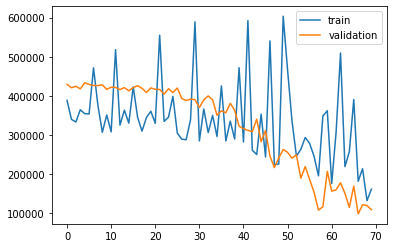

In [ ]:
import matplotlib.pyplot as plt

# Extract the loss values from the history object
loss = history1.history['loss']
val_loss = history1.history['val_loss']

# Plot the loss curves
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(['train', 'validation'])
plt.show()

#Model 2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model2 = Sequential()
model2.add(Dense (128,input_dim=10,kernel_initializer='glorot_uniform',activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(64,kernel_initializer='glorot_uniform',activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(16,kernel_initializer='glorot_uniform',activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(16,kernel_initializer='glorot_uniform',activation='relu'))
model2.add(Dense(8,kernel_initializer='glorot_uniform',activation='relu'))
model2.add(Dense(2,kernel_initializer='glorot_uniform',activation='relu'))
model2.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))

model2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 128)               1408      
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_131 (Dense)           (None, 64)                8256      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_132 (Dense)           (None, 16)                1040      
                                                                 
 dropout_30 (Dropout)        (None, 16)                0         
                                                                 
 dense_133 (Dense)           (None, 16)              

In [ ]:
model2.compile(loss="mean_squared_error",optimizer='adam', metrics=['mae'])

In [ ]:
history2 = model2.fit(X_train,Y_train,epochs=70,batch_size=5,verbose=1,validation_split=0.2)

Epoch 1/70
3770/3770 [==============================] - 12s 3ms/step - loss: 354014.5312 - mae: 121.0301 - val_loss: 423369.8750 - val_mae: 117.8920
Epoch 2/70
3770/3770 [==============================] - 11s 3ms/step - loss: 367637.2812 - mae: 117.9132 - val_loss: 428897.7812 - val_mae: 111.9059
Epoch 3/70
3770/3770 [==============================] - 11s 3ms/step - loss: 299429.5625 - mae: 115.4473 - val_loss: 426356.5000 - val_mae: 111.3894
Epoch 4/70
3770/3770 [==============================] - 11s 3ms/step - loss: 390459.8125 - mae: 114.5068 - val_loss: 409751.1562 - val_mae: 126.5040
Epoch 5/70
3770/3770 [==============================] - 11s 3ms/step - loss: 298803.1250 - mae: 110.9014 - val_loss: 415124.8750 - val_mae: 117.7547
Epoch 6/70
3770/3770 [==============================] - 11s 3ms/step - loss: 302251.8750 - mae: 114.9698 - val_loss: 414679.3750 - val_mae: 112.1917
Epoch 7/70
3770/3770 [==============================] - 10s 3ms/step - loss: 439155.0000 - mae: 114.6751 -

In [ ]:
y_pred2 = model2.predict(X_test) 

185/185 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(Y_test,y_pred2))  

r_square score:  0.7769614602068435


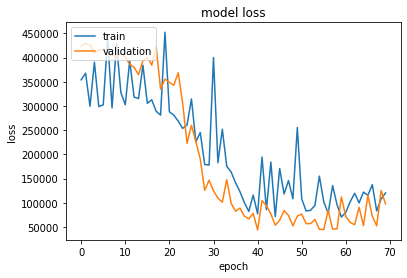

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Model 3

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model3 = Sequential()
model3.add(Dense(128, input_dim=10, kernel_initializer='normal', activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(64, kernel_initializer='normal', activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(8, kernel_initializer='normal', activation='relu'))
model3.add(Dense(1, kernel_initializer='normal', activation='linear'))

model3.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 128)               1408      
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_107 (Dense)           (None, 64)                8256      
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_108 (Dense)           (None, 8)                 520       
                                                                 
 dense_109 (Dense)           (None, 1)                 9         
                                                                 
Total params: 10,193
Trainable params: 10,193
Non-tra

In [ ]:
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [ ]:
history3 = model3.fit(X_train, Y_train, epochs=70, batch_size=8, verbose=1, validation_split=0.2)

Epoch 1/70
2356/2356 [==============================] - 7s 3ms/step - loss: 398802.5312 - mae: 123.6044 - val_loss: 424833.5312 - val_mae: 138.9027
Epoch 2/70
2356/2356 [==============================] - 6s 3ms/step - loss: 335822.8750 - mae: 129.5107 - val_loss: 421828.3438 - val_mae: 125.9948
Epoch 3/70
2356/2356 [==============================] - 6s 2ms/step - loss: 302363.4375 - mae: 122.4802 - val_loss: 413793.6562 - val_mae: 138.4270
Epoch 4/70
2356/2356 [==============================] - 6s 2ms/step - loss: 305932.0000 - mae: 119.0612 - val_loss: 420226.2812 - val_mae: 125.9954
Epoch 5/70
2356/2356 [==============================] - 6s 3ms/step - loss: 307725.1875 - mae: 116.5257 - val_loss: 414293.5938 - val_mae: 139.5930
Epoch 6/70
2356/2356 [==============================] - 6s 3ms/step - loss: 328738.1875 - mae: 121.6137 - val_loss: 418850.1875 - val_mae: 128.3022
Epoch 7/70
2356/2356 [==============================] - 6s 3ms/step - loss: 311439.8125 - mae: 119.9478 - val_lo

In [ ]:
y_pred3 = model3.predict(X_test) 

185/185 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(Y_test,y_pred3))  

r_square score:  0.5671387035745261


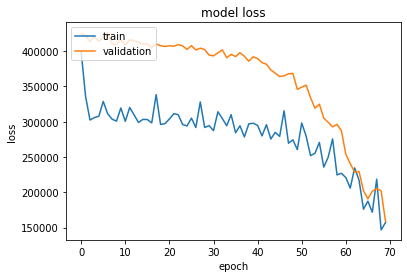

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model 2 e најдобар, со r^2 score = 0.7769614602068435

Но очигледно од визуелизацијата на учењето може да приметиме дека има простор за подобрување, па затоа решив да го направам овој модел 2 по вторпат но со 200 епохи наместо 70 to push it to the limit.

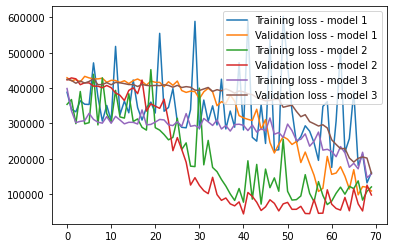

In [ ]:
import matplotlib.pyplot as plt

# Extract the loss values from the history objects
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

# Plot the loss curves for all three models
plt.plot(loss1, label='Training loss - model 1')
plt.plot(val_loss1, label='Validation loss - model 1')
plt.plot(loss2, label='Training loss - model 2')
plt.plot(val_loss2, label='Validation loss - model 2')
plt.plot(loss3, label='Training loss - model 3')
plt.plot(val_loss3, label='Validation loss - model 3')
plt.legend()
plt.show()

#**Extra**
### Model 2 - Pushed Further
____

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model4 = Sequential()
model4.add(Dense(128, input_dim=10, kernel_initializer='normal', activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(64, kernel_initializer='normal', activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(8, kernel_initializer='normal', activation='relu'))
model4.add(Dense(1, kernel_initializer='normal', activation='linear'))

model4.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_149 (Dense)           (None, 128)               1408      
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_150 (Dense)           (None, 64)                8256      
                                                                 
 dropout_41 (Dropout)        (None, 64)                0         
                                                                 
 dense_151 (Dense)           (None, 8)                 520       
                                                                 
 dense_152 (Dense)           (None, 1)                 9         
                                                                 
Total params: 10,193
Trainable params: 10,193
Non-tra

In [ ]:
model4.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [ ]:
history4 = model4.fit(X_train, Y_train, epochs=200, batch_size=8, verbose=1, validation_split=0.2)

Epoch 1/200
2356/2356 [==============================] - 10s 4ms/step - loss: 390654.8750 - mae: 123.4219 - val_loss: 421769.9375 - val_mae: 143.9194
Epoch 2/200
2356/2356 [==============================] - 6s 2ms/step - loss: 327615.6875 - mae: 126.2009 - val_loss: 417354.5938 - val_mae: 132.6863
Epoch 3/200
2356/2356 [==============================] - 6s 2ms/step - loss: 314103.2500 - mae: 118.6710 - val_loss: 414944.4688 - val_mae: 141.1899
Epoch 4/200
2356/2356 [==============================] - 6s 2ms/step - loss: 309408.4688 - mae: 120.2581 - val_loss: 418551.9688 - val_mae: 130.7963
Epoch 5/200
2356/2356 [==============================] - 6s 3ms/step - loss: 304991.0000 - mae: 116.7495 - val_loss: 412115.5312 - val_mae: 129.2922
Epoch 6/200
2356/2356 [==============================] - 6s 2ms/step - loss: 338323.2188 - mae: 117.2006 - val_loss: 411872.3438 - val_mae: 126.0249
Epoch 7/200
2356/2356 [==============================] - 6s 2ms/step - loss: 311059.2812 - mae: 114.5383 

In [ ]:
y_pred4 = model4.predict(X_test) 

185/185 [==============================] - 0s 1ms/step


0.93 р^2 score, подобро здравје

In [ ]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(Y_test,y_pred4))  

r_square score:  0.9324134999286959


Кога го визуелизираме ова, јасно се гледа дека после некаде 100 епохи се стабилизира и нема некои многу значајни промени.


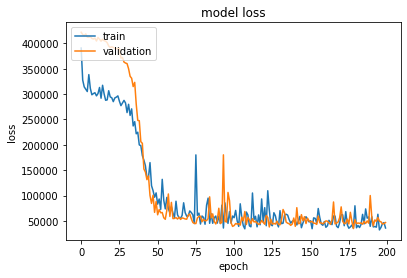

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()